# Introduction to elementary ideas in Fourier series

We illustrate the basic construction of a square wave with successively
higher order approximations.

A square wave can be approximated as

$$
f(t) \approx \lim_{n \rightarrow \infty} \sum_{i=0}^n \frac{1}{2i+1}\sin ((2i+1)t)
$$

In this exercise, we will explore how this construction proceeds for finite values of $n$, by plotting the results of the partial sums.

First, some routine initialization.

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy import *

## Exercise

Define: 

* a function `square` to add N terms of a square wave, that returns the array `t` where the function is sampled and the wave samples `f`.
* a function `square_terms` that will return `t`, `f`, but also the individual components of the sum above.  This latter function will be used to plot the individual terms of the approximation and understand how they counterbalance each other.

In [4]:
def square(nterms=5, npts=2000):
    """Add nterms to construct a square wave.

    Computes an approximation to a square wave using a total of nterms.
    
    Parameters
    ----------
    nterms : int, optional
      Number of terms to use in the sum.
    npts : int, optional
      Number of points at which to sample the function.

    Returns
    -------
    t : array
      The t values where the wave was sampled.
    y : array
      The square wave approximation (the final sum of all terms).
      """
    
# Your code here

In [5]:
def square_terms(nterms=5, npts=500):
    """Compute all nterms to construct a square wave.

    Computes an approximation to a square wave using a total of nterms, and
    returns the individual terms as well as the final sum.
    
    Parameters
    ----------
    nterms : int, optional
      Number of terms to use in the sum.
    npts : int, optional
      Number of points at which to sample the function.

    Returns
    -------
    t : array
      The t values where the wave was sampled.
    y : array
      The square wave approximation (the final sum of all terms).
    terms : array of shape (nterms, npts)
      Array with each term of the sum as one row.
      """
    
# Your code here

Using these two functions above, we can now build a couple of plotting utilities and study how the individual terms add up to form a square wave.

First, we build our utility plotting functions:

In [6]:
def plot_square(terms):
    """Plot the square wave construction for a list of total number of terms.

    Parameters
    ----------
    terms : int or list of ints
      If a list is given, the plot will be constructed for all terms in it.
    """
    plt.figure()

    if isinstance(terms, int):
        # Single term, just put it in a list since the code below expects a list
        terms = [terms]
        
    for nterms in terms:
        t, y = square(nterms)
        plt.plot(t, y, label='n=%s' % nterms)

    plt.grid()
    plt.legend()
    plt.title('Square wave with n terms')

In [7]:
def plot_square_terms(nterms):
    """Plot individual terms of square wave construction."""
    plt.figure()

    t, y, terms = square_terms(nterms)
    for i,term in enumerate(terms):
        plt.plot(t, term, label='freq=%i' % (2*i+1))
        
    plt.plot(t, y, color='k', linewidth=2, label='sum')
    plt.grid()
    plt.legend()
    plt.title('Individual components of a square wave')

With this we can plot the full construction for low # of terms

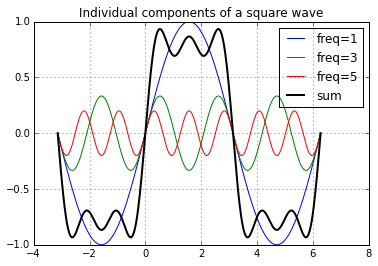

In [9]:
plot_square_terms(3)

Then, we can see how successive approximations work:

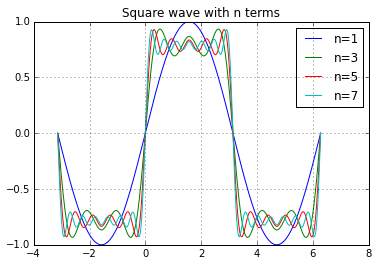

In [10]:
plot_square(range(1, 9, 2))

The [Gibbs phenomenon](https://en.wikipedia.org/wiki/Gibbs_phenomenon) is the term given to the behavior of the Fourier series at the discontinuity.  As we add more and more terms, while the approximation gets more accurate away from the discontinuity, there is an overshoot at the discontinuity that doesn't improve with more terms:

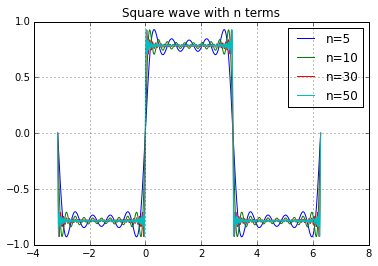

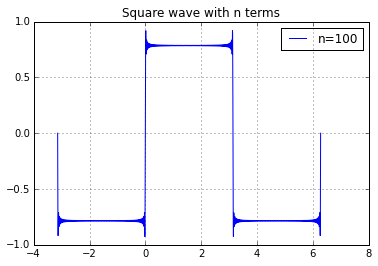

In [11]:
plot_square([5,10,30,50])
plot_square(100)

The use of [Cesaro summation](https://en.wikipedia.org/wiki/Ces%C3%A0ro_summation) can mitigate the Gibbs phenomenon:

In [16]:
def plot_cesaro(nterms):
    """Cesaro summation"""
    t, y, terms = square_terms(nterms)
    csum = terms.cumsum(axis=0)
    yc = csum.mean(axis=0)
    plt.plot(t, yc, label='cesaro(%s)' % nterms, lw=3)
    plt.legend()

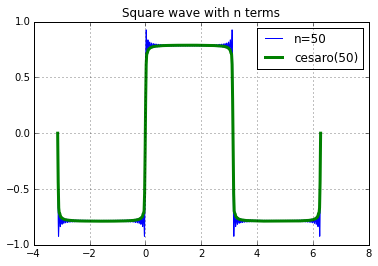

In [19]:
# Using the Cesaro summation 
plot_square(50)
plot_cesaro(50)